In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize']=(15,10)
plt.rcParams['figure.dpi']=250
sns.set_style='darkgrid'
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

C:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
data=pd.read_csv('D:\ExcelR\Data science\Assignments\SVM Assignment14\mushroom.csv')
data

,Unnamed: 0,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,1167,sunken,scaly,white,no,anise,descending,distant,broad,pink,...,partial,brown,two,sheathing,chocolate,clustered,waste,poisonous,14.276173,5.054983
1,1037,sunken,fibrous,red,no,anise,notched,crowded,narrow,chocolate,...,universal,brown,two,sheathing,brown,numerous,waste,edible,3.952715,19.068319
2,309,flat,grooves,purple,yes,foul,descending,crowded,broad,purple,...,universal,yellow,two,sheathing,purple,abundant,waste,poisonous,9.054265,7.205884
3,282,bell,scaly,pink,yes,fishy,notched,close,broad,orange,...,partial,yellow,two,cobwebby,green,clustered,grasses,poisonous,5.226499,20.932692
4,820,flat,smooth,yellow,yes,musty,free,crowded,narrow,orange,...,universal,white,none,none,yellow,clustered,urban,poisonous,14.037532,12.545245
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,863,sunken,scaly,brown,yes,foul,attached,crowded,narrow,chocolate,...,partial,orange,one,flaring,purple,abundant,leaves,poisonous,5.877891,17.464145
1996,1160,sunken,scaly,purple,yes,musty,attached,distant,narrow,red,...,partial,white,one,zone,yellow,numerous,waste,poisonous,6.500840,13.501957
1997,265,convex,grooves,green,yes,fishy,notched,close,narrow,pink,...,partial,brown,two,evanescent,yellow,abundant,woods,poisonous,13.558064,11.270020
1998,411,bell,smooth,white,no,pungent,free,close,narrow,orange,...,universal,yellow,one,cobwebby,brown,solitary,woods,poisonous,11.092703,8.423199


In [3]:
data.isna().sum()

Unnamed: 0                  0
cap_shape                   0
cap_surface                 0
cap_color                   0
bruises                     0
odor                        0
gill_attachment             0
gill_spacing                0
gill_size                   0
gill_color                  0
stalk_shape                 0
stalk_root                  0
stalk_surface_above_ring    0
stalk_surface_below_ring    0
stalk_color_above_ring      0
stalk_color_below_ring      0
veil_type                   0
veil_color                  0
ring_number                 0
ring_type                   0
spore_print_color           0
population                  0
habitat                     0
class                       0
stalk_height                0
cap_diameter                0
dtype: int64

In [4]:
df=data.apply(LabelEncoder().fit_transform)
df

,Unnamed: 0,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,889,4,2,7,0,1,1,2,0,7,...,0,0,2,6,3,1,5,1,916,190
1,786,4,0,6,0,1,3,1,1,3,...,1,0,2,6,1,2,5,0,128,750
2,246,3,1,5,1,4,1,1,0,8,...,1,3,2,6,6,0,5,1,537,281
3,221,0,2,4,1,3,3,0,0,6,...,0,3,2,0,4,1,0,1,234,829
4,630,3,3,8,1,5,2,1,1,6,...,1,2,0,4,8,1,4,1,895,484
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,656,4,2,0,1,4,0,1,1,3,...,0,1,1,2,6,0,1,1,283,680
1996,885,4,2,5,1,5,0,2,1,9,...,0,2,1,7,8,2,5,1,335,521
1997,205,2,1,3,1,3,3,0,1,7,...,0,0,2,1,8,0,6,1,859,438
1998,329,0,3,7,0,7,2,0,1,6,...,1,3,1,0,1,5,6,1,679,320


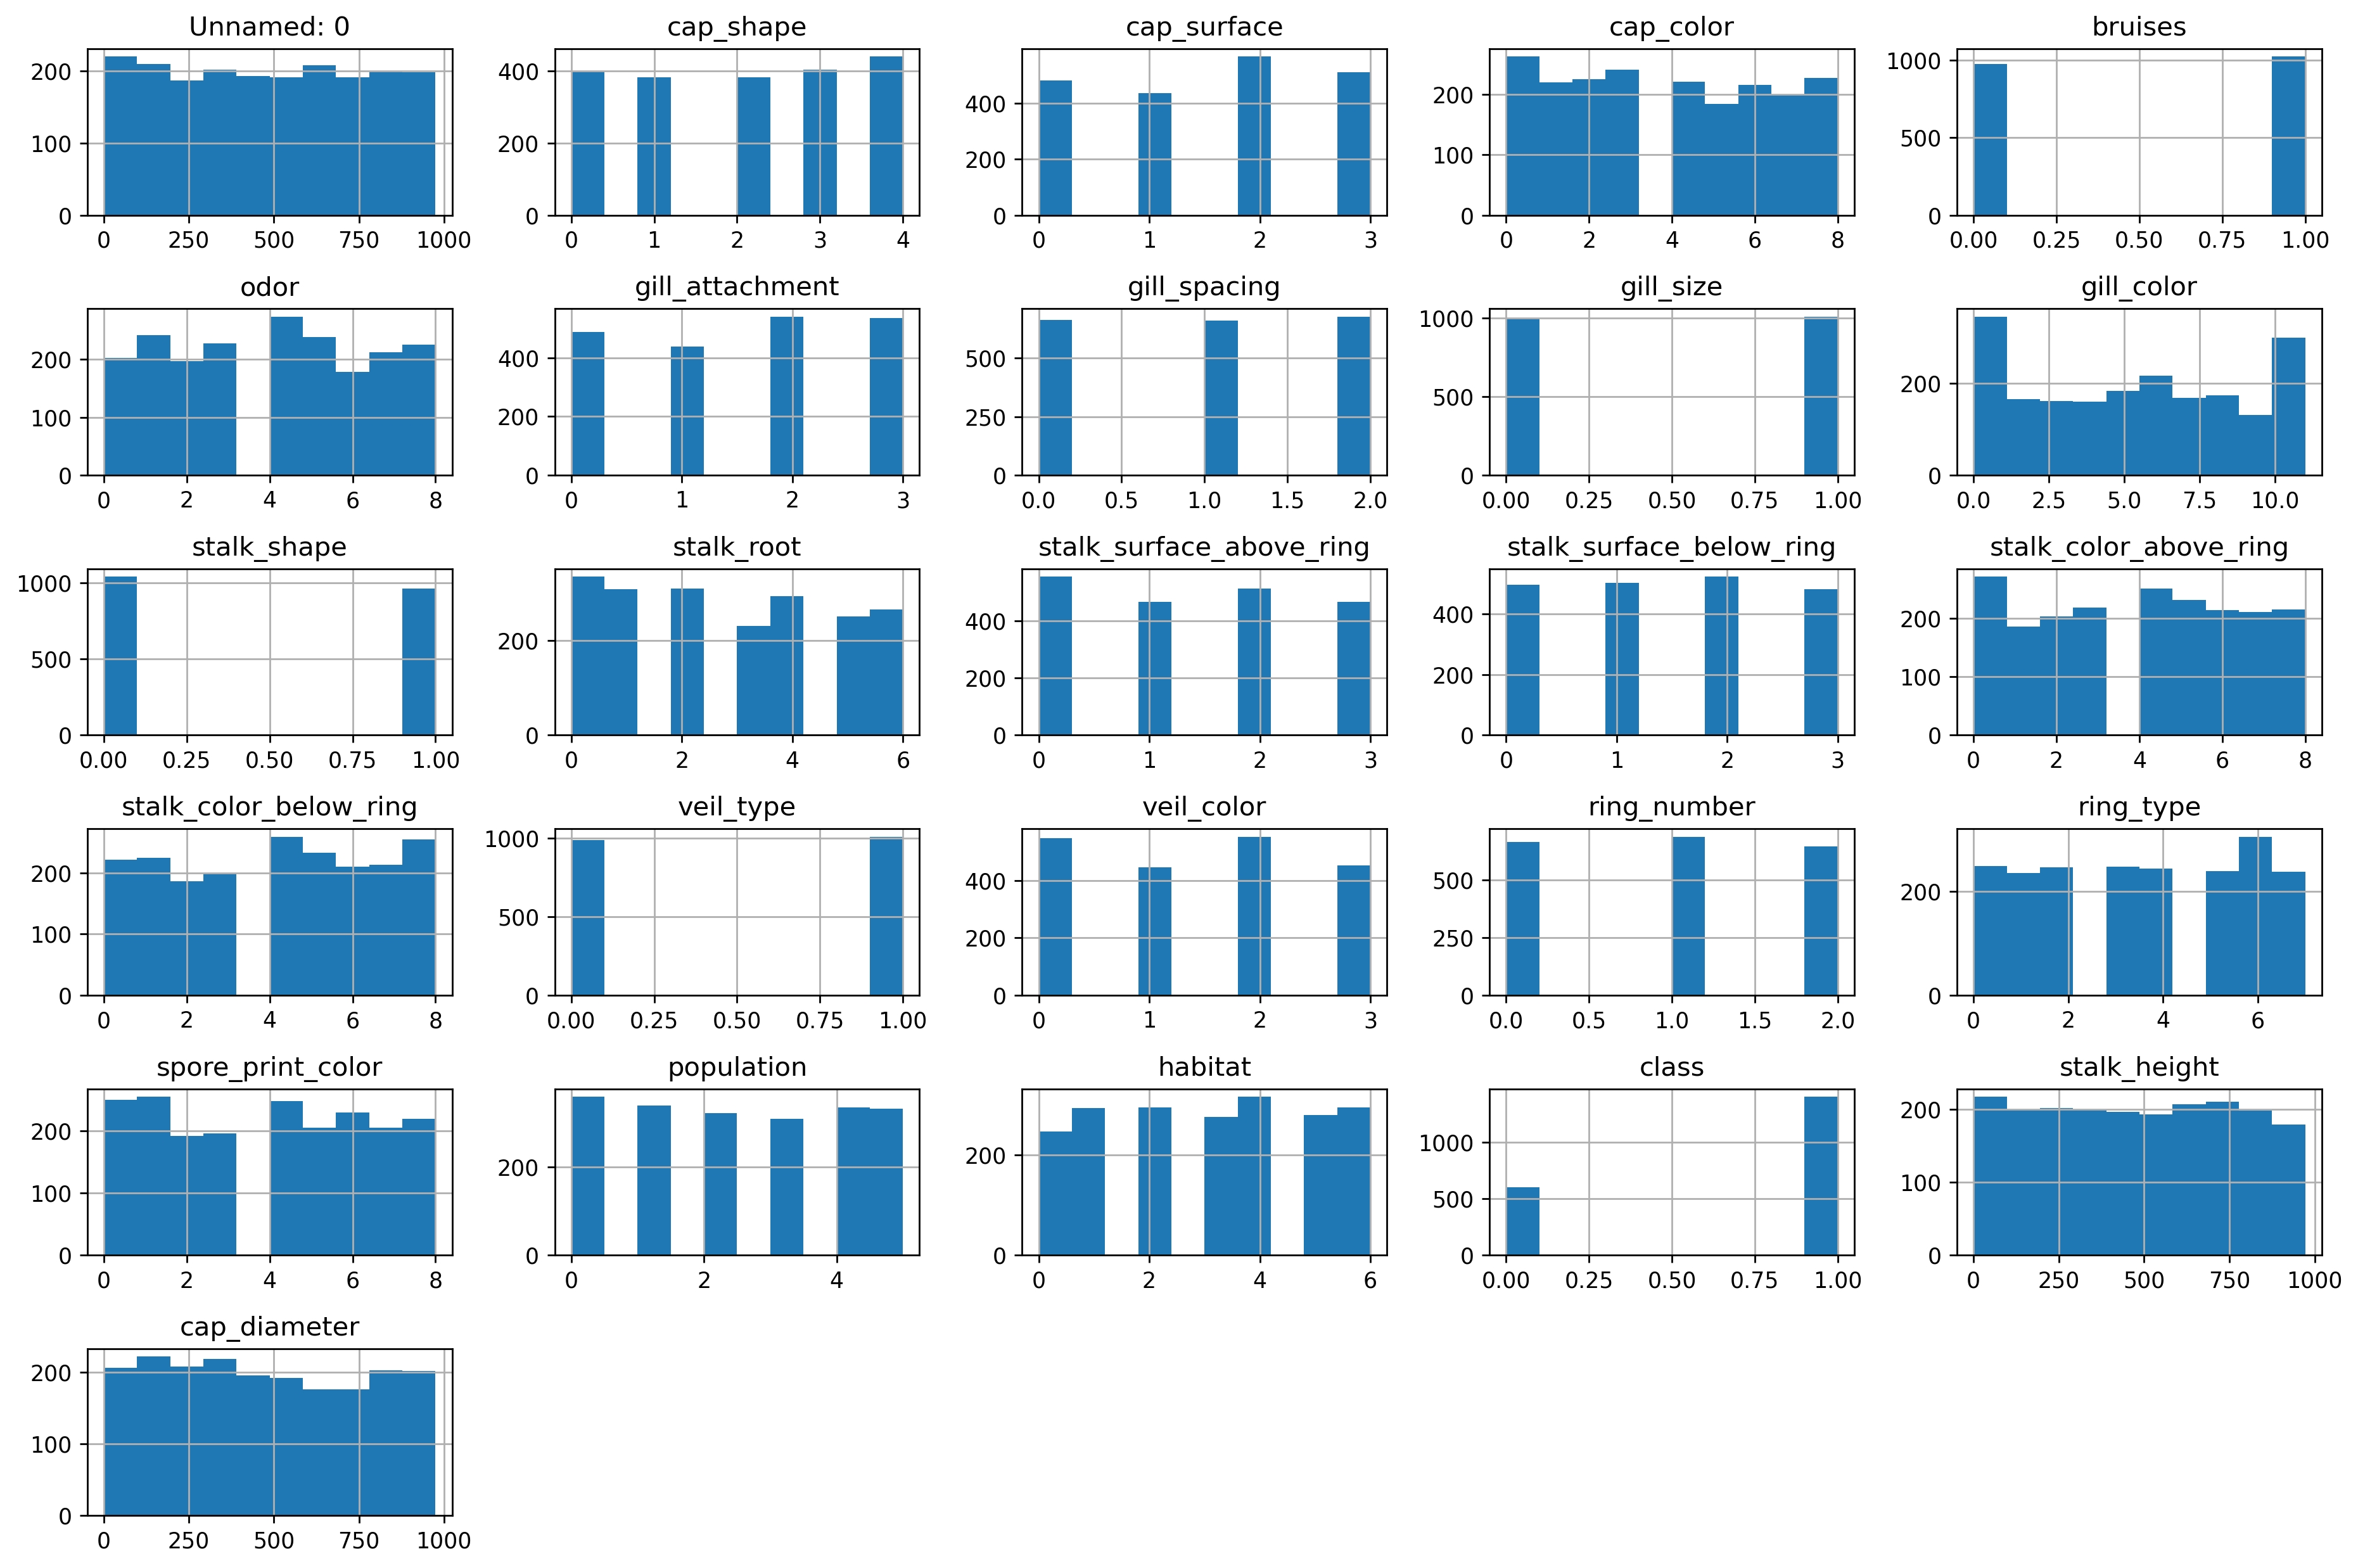

In [5]:
df.hist()
plt.tight_layout()

## Model Building

In [8]:
x=df.iloc[:,1:]
y=df.iloc[:, 0]

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=1)

In [11]:
svc=SVC()

svc.fit(xtrain,ytrain)
ypred=svc.predict(xtest)

In [12]:
print(svc.score(xtrain,ytrain))
print(svc.score(xtest,ytest))

0.040625
0.005


In [13]:
sc = StandardScaler()
x = sc.fit_transform(x)

In [14]:
xtrain

,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,stalk_shape,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,4,2,7,0,1,1,2,0,7,1,...,0,0,2,6,3,1,5,1,916,190
816,1,0,0,0,4,3,2,1,11,1,...,0,3,1,4,5,4,4,1,314,316
790,1,0,2,0,3,0,2,0,3,1,...,1,2,2,2,2,2,6,1,258,891
361,1,2,5,0,3,1,0,1,3,1,...,1,0,1,7,8,5,3,0,874,423
592,3,0,6,1,4,2,0,0,11,0,...,1,1,1,2,4,2,1,1,935,780
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1791,0,0,7,0,4,3,0,0,2,0,...,0,2,0,2,4,3,1,0,20,219
1096,0,2,6,1,3,2,1,1,11,0,...,0,0,2,5,6,3,1,0,310,452
1932,2,1,6,0,7,3,1,0,2,1,...,1,0,0,6,4,0,1,0,64,971
235,2,0,8,1,8,3,0,0,0,0,...,1,2,1,5,4,4,4,0,849,195


In [15]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y, test_size=0.2, random_state=1)
svc = SVC(kernel='poly')

svc.fit(xtrain,ytrain)
ypred = svc.predict(xtest)
print(svc.score(xtrain,ytrain))
print(svc.score(xtest,ytest))

0.886875
0.5525


In [16]:
from sklearn.model_selection import GridSearchCV

In [17]:
param = {
    'kernel' : ['linear','rbf','poly']
}

In [18]:
grid = GridSearchCV(SVC(), param_grid= param, verbose=1)

In [19]:
grid.fit(xtrain,ytrain)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


GridSearchCV(estimator=SVC(), param_grid={'kernel': ['linear', 'rbf', 'poly']},
             verbose=1)

In [20]:
grid.best_params_

{'kernel': 'linear'}

In [21]:
svc = SVC(kernel='linear')

svc.fit(xtrain,ytrain)
ypred = svc.predict(xtest)
print(svc.score(xtrain,ytrain))
print(svc.score(xtest,ytest))

1.0
0.7025
